In [30]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import IsolationForest
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from subprocess import check_output
import os
import pandas as pd
import time
import scipy
from scipy import stats
import sys
%matplotlib inline

print "Checking files in data location ..."
print(check_output(["ls", "../data"]).decode("utf8"))

print "Checking files in exp location ..."
print(check_output(["ls", "../exp"]).decode("utf8"))

print "Done!"

Checking files in data location ...
creditcard.csv
creditcard.csv.zip
__init__.py

Checking files in exp location ...

Done!


Setting location of the data and loading it into a pandas dataframe

In [31]:
print "#" * 150
print "Loading data ..."
dataDir = '../data'
expDir = '../exp'
data = os.path.join(dataDir, 'creditcard.csv')
df = pd.read_csv(data)
print "Data loaded succesfully into dataframe"

print"Data loaded with shape: {}".format(df.shape)
# print df.head(10)
# print df.columns
print df.describe()

######################################################################################################################################################
Loading data ...


Data loaded succesfully into dataframe
Data loaded with shape: (284807, 31)


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [32]:
df.Time[df.Class == 1].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [33]:
df.Time[df.Class == 0].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

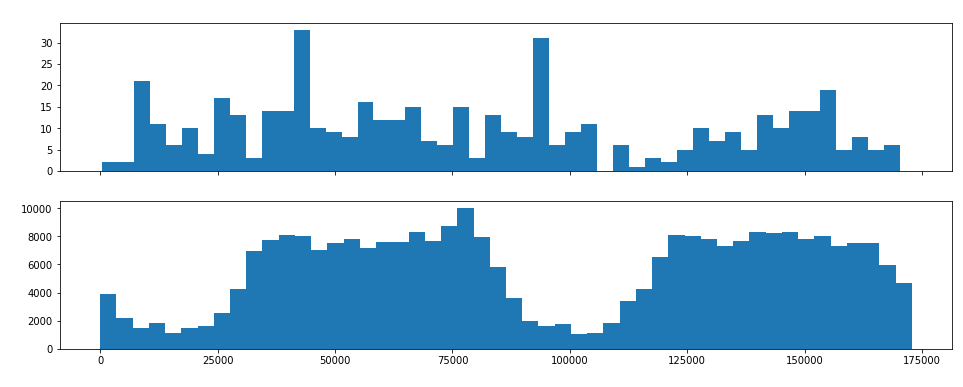

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 6))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins=bins)
ax1.set_title('Fraud', color="white")

ax2.hist(df.Time[df.Class == 0], bins=bins)
ax2.set_title('Normal', color="white")

plt.xlabel('Time (in Seconds)', color="white")
plt.ylabel('Number of Transactions', color="white")
plt.show()

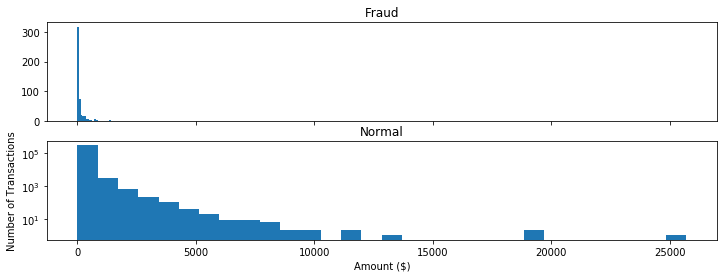

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [36]:
y = df['Class'].values
X = df.drop(['Class'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
start_time_b = time.time()
rfb = RandomForestClassifier()
rfb.fit(X, y)
score_RF = rfb.score(X, y)
predictrf = rfb.predict(X)
print "Training Score Random Forest: %s" % score_RF
elapsed_time_g = time.time() - start_time_b
print "Training Baseline for Random Forest took: %s" % str(elapsed_time_g)

Feature importance:
Feature importance Random Forest Training: 
[('Time', 0.010976758603510273), ('V1', 0.015569827501100187), ('V2', 0.008552710624006688), ('V3', 0.011986487180268908), ('V4', 0.02267160190199686), ('V5', 0.006345584992281622), ('V6', 0.007739132156629316), ('V7', 0.024218543390142712), ('V8', 0.013584534166948067), ('V9', 0.021851571443440743), ('V10', 0.06972511710237142), ('V11', 0.09985531178039113), ('V12', 0.1604030887694779), ('V13', 0.00917231616382267), ('V14', 0.08174322719694897), ('V15', 0.013410321711527933), ('V16', 0.09286757940437076), ('V17', 0.16851370142314187), ('V18', 0.018480763138439087), ('V19', 0.008815868120994242), ('V20', 0.020797740048902436), ('V21', 0.012392402411850153), ('V22', 0.015825921791158257), ('V23', 0.003723263068592582), ('V24', 0.007882317111484988), ('V25', 0.010811521693465453), ('V26', 0.021397687530480936), ('V27', 0.01908328380622211), ('V28', 0.00960147264600326), ('Amount', 0.012000343120028458)]


In [40]:


print "Feature importance:"
fimp = list(zip(X, rfb.feature_importances_))
print "Feature importance Random Forest Training: "
print fimp


Feature importance:
Feature importance Random Forest Training: 
[('Time', 0.010976758603510273), ('V1', 0.015569827501100187), ('V2', 0.008552710624006688), ('V3', 0.011986487180268908), ('V4', 0.02267160190199686), ('V5', 0.006345584992281622), ('V6', 0.007739132156629316), ('V7', 0.024218543390142712), ('V8', 0.013584534166948067), ('V9', 0.021851571443440743), ('V10', 0.06972511710237142), ('V11', 0.09985531178039113), ('V12', 0.1604030887694779), ('V13', 0.00917231616382267), ('V14', 0.08174322719694897), ('V15', 0.013410321711527933), ('V16', 0.09286757940437076), ('V17', 0.16851370142314187), ('V18', 0.018480763138439087), ('V19', 0.008815868120994242), ('V20', 0.020797740048902436), ('V21', 0.012392402411850153), ('V22', 0.015825921791158257), ('V23', 0.003723263068592582), ('V24', 0.007882317111484988), ('V25', 0.010811521693465453), ('V26', 0.021397687530480936), ('V27', 0.01908328380622211), ('V28', 0.00960147264600326), ('Amount', 0.012000343120028458)]


In [42]:
dfimp = dict(fimp)
dfimp = pd.DataFrame(dfimp.items(), columns=['Metric', 'Importance'])
sdfimp = dfimp.sort_values('Importance', ascending=False)
dfimpCsv = 'Feature_Importance_RF_%s.csv' % 'DM'
sdfimp.to_csv(os.path.join(expDir, dfimpCsv))
